In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../input/house-rent-prediction-dataset/"
os.listdir(DATA_DIR)

['Dataset Glossary.txt', 'House_Rent_Dataset.csv']

# Objective
Our goal is to predict `rent` from the different features present

In [3]:
df = pd.read_csv(DATA_DIR+'House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Exploratory Analysis
In this phase we will extract few statistical measures, see distribution of data and data types of columns, in the next section we will try to make sense of our findings here. These steps will guide us towards good feature engineering as we rarely need more than a few features to describe relationship between `target` and features. 

In [4]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


We also want to check if there are any missing values as most ML models don't work with them so we would need to find some apt way to deal with them during feature engineering phase

In [6]:
df.isnull().sum().sort_values(ascending=False)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Data Distributions

In [7]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [8]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [9]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [10]:
rent_by_city = df.groupby(['City'], as_index=True)['Rent'].mean()

<AxesSubplot:xlabel='City'>

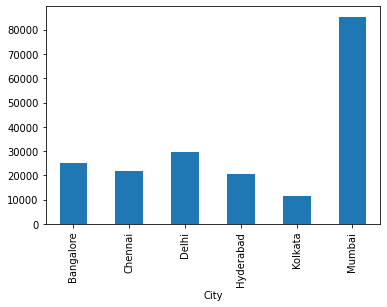

In [11]:
rent_by_city.plot(kind='bar')

In [12]:
rent_by_area = df.groupby(['Area Locality'], as_index=True)['Rent'].mean()


In [13]:
rent_by_area.sort_values(ascending=False)

Area Locality
Raheja Artesia, Worli      1000000.0
Marathahalli                715780.0
Lady Ratan Tower, Worli     700000.0
Vettuvankeni                600000.0
Bandra East                 600000.0
                             ...    
Bhawanipur                    3200.0
Hatiara                       3000.0
Rhoda Mistri Nagar            3000.0
Ennore                        3000.0
Behala silpara                2200.0
Name: Rent, Length: 2235, dtype: float64

# Univariate Analysis
Histograms show the overall distribution of dataset. Boxplots are useful for detecting outliers.


<AxesSubplot:xlabel='Rent', ylabel='Count'>

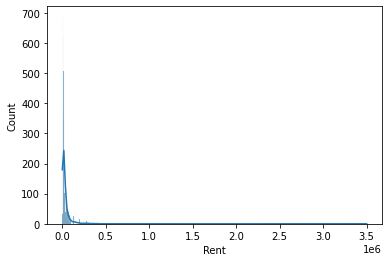

In [14]:
sns.histplot(data=df, x="Rent", kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rent'>

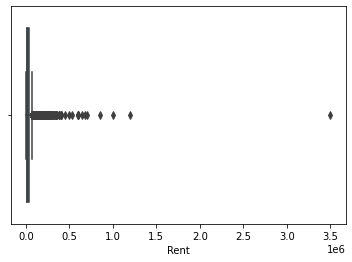

In [15]:
sns.boxplot(df['Rent'], data=df)  

# Bivariate Analysis
Between categorical variables

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

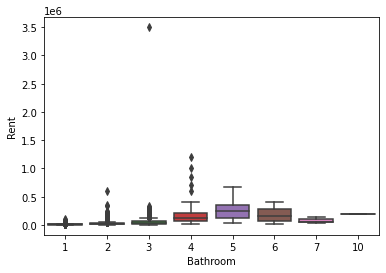

In [16]:
sns.boxplot(df['Bathroom'], df['Rent'], data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BHK', ylabel='Rent'>

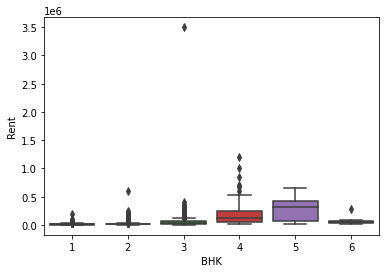

In [17]:
sns.boxplot(df['BHK'], df['Rent'], data=df)

In [18]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

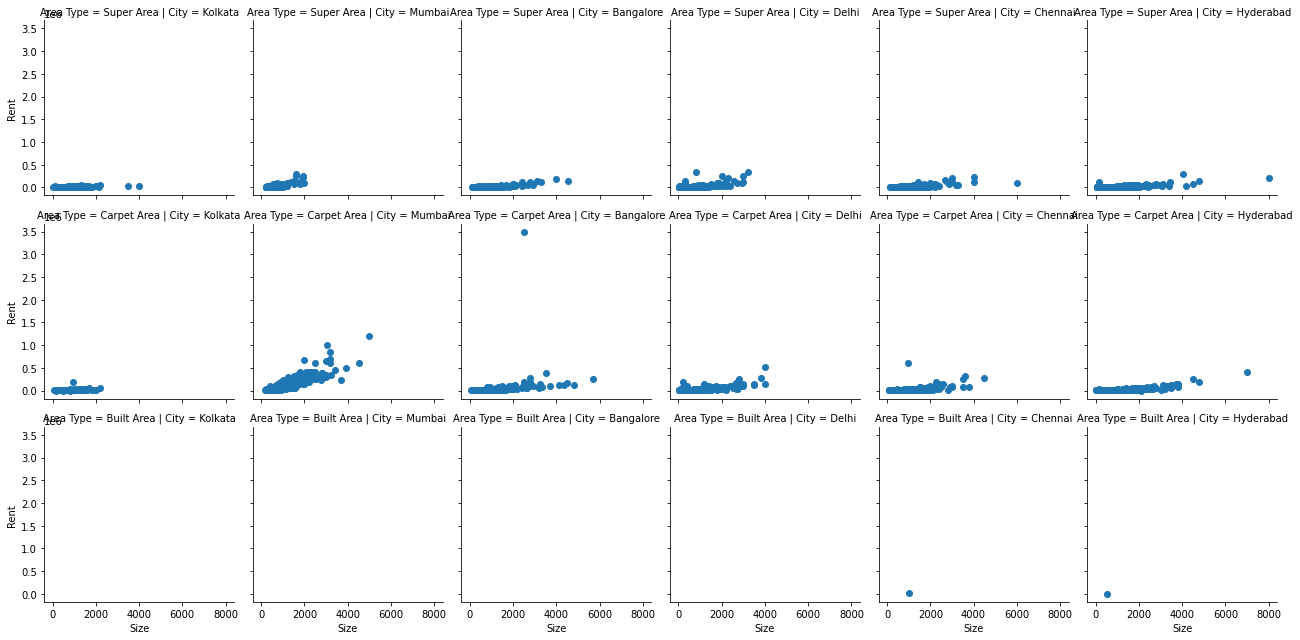

In [19]:
facet = sns.FacetGrid(df, col='City', row='Area Type')

# Generate a facetted scatter plot
facet.map(plt.scatter, 'Size', 'Rent')
plt.show()